*Licensed under the MIT License. See LICENSE-CODE in the repository root for details.*

*Copyright (c) 2025 Eleni Kamateri*

### Classification Test Set Creation (Ground Truth)

This script generates classification test sets (i.e., ground truth) based on specific criteria, using a CSV file that contains essential data for analyzing patent documents within a specific core vertical (e.g., EP).

#### Overview

The script is divided into two main parts:

- Part I: Processes the available labels from the specific core vertical to determine which will be included in the test sets.
- Part II: Selects patents that meet specific criteria to populate the test sets.

### Test Set Alternatives (Part I)

Four different test set variations can be generated:

1. A test set containing all labels.
2. A test set excluding outliers (labels within the 5%-95% range).
3. A test set with well-represented labels (labels assigned to over 50 or 100 patents).
4. A test set with few-shot labels (labels assigned to under 50 or 100 patents).
    
### Selection Criteria for Test Set (Part II)

Patent documents or virtual patents included in the test sets must meet the following criteria:

1. Complete textual fields (i.e., abstract, description, and claims).
2. B kind code (i.e., B1, B2, B3, B6, B8, B9).
3. Submitted in the last quarter of 2015 (after October 1, 2015).
4. Contain at least one of the labels assigned to the specific test set.

### Important Note

To ensure accurate label processing and test set generation, virtual patents were created by merging different kind codes of the same patent, retaining the latest information for each field.

### Configurable Parameters

Researchers can modify the following parameters to customize the test set generation:

**destination_path** – Path to the folder where the generated files will be stored. 


**csv_file_path** – Path to the CSV file containing data for the specific vertical.

**sep** – Defines the separator used in the CSV file:

        0: Semicolon (;)
        
        1: Comma (,)
              
**kind_code_selection** – Selects the type of documents for the test set:
        
        0: B documents (default).
        
        1: A documents (for cases like the WO core vertical, which only has A documents).
        
**date_selection** – Allows modification of the date criteria for selected documents.

        20151000 (default).
        
**classification_selection** – Specifies the classification system used to create the test set:
        
        0: Main/Further classification labels
        
        1: IPCR labels
        
        2: CPC labels
        
The code below creates classification test sets for the #EP core vertical and IPCR labels.

### Set the required parameters for the script

In [24]:
filename1="1"
filename2="2"
filename3="3a"
filename4="3b"
filename5="4a"
filename6="4b"
destination_path="/YOUR_PATH/WPI-Dataset/"
csv_file_path='/YOUR_PATH/EP_csv_file_for_wpi_analysis.csv'
sep=0
kind_code_selection=0
date_selection=20151000
classification_selection=2

### Import all required libraries for the script

In [25]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer

### Import the CSV file and load its data into a DataFrame

In [26]:
if sep==0:
    DF = pd.read_csv(csv_file_path, header=0, delimiter=";") #, nrows=1000)
elif sep==1:
    DF = pd.read_csv(csv_file_path, header=0) #, nrows=1000)
else:
    print("Please provide a valid value for sep")

print(DF.shape)
DF.head(1)

(552439, 11)


,Unnamed: 0,xml_file_name,ucid,date,main_classification,further_classification,classification_ipcr,classification_cpc,abstract_lang_en_exist,description_lang_en_exist,claims_lang_en_exist
0,0,EP-2677851-A1.xml,EP-2677851-A1,20140101,NaN,NaN,A01B 79/02 20060101AFI20120911BHEP ...,A01B 79/005 20130101 LI20150420BHEP ...,1.0,1.0,1.0


### Identify the patent number and kind code, and append these fields to the initial DataFrame

In [27]:
DF['patent_number']=DF['xml_file_name'].str.split(".").str[0]
DF['patent_number']=DF['patent_number'].str.split("-").str[1:2]
DF['patent_number']=DF['patent_number'].str.join('')

DF['kind_code']=DF['xml_file_name'].str.split(".").str[0]
DF['kind_code']=DF['kind_code'].str.split("-").str[2:3]
DF['kind_code']=DF['kind_code'].str.join('')

DF['kind_code_letter']=DF['kind_code'].str[0]

### Remove unnecessary columns
Since we are creating classification test sets for IPCR labels, we delete the columns containing IPC and CPC labels.

In [28]:
if classification_selection==0:
    DF['labels']=DF['main_classification'] + ", " + DF['further_classification']
    if 'classification_ipcr' in df.columns:
        del DF['classification_ipcr']
    if 'classification_cpc' in df.columns:
        del DF['classification_cpc']     
elif classification_selection==1:
    DF=DF.rename(columns={'classification_ipcr': 'labels'})
    if 'main_classification' in DF.columns:
        del DF['main_classification']
    if 'further_classification' in DF.columns:
        del DF['further_classification']
    if 'classification_cpc' in DF.columns:
        del DF['classification_cpc'] 
elif classification_selection==2:
    DF=DF.rename(columns={'classification_cpc': 'labels'})
    if 'main_classification' in DF.columns:
        del DF['main_classification']
    if 'further_classification' in DF.columns:
        del DF['further_classification']
    if 'classification_ipcr' in DF.columns:
        del DF['classification_ipcr'] 
else:
    print("Please provide a valid value for classification_selection")

cols_to_replace = ['abstract_lang_en_exist', 'description_lang_en_exist', 'claims_lang_en_exist']
DF[cols_to_replace] = DF[cols_to_replace].astype(int)

DF.head(1)

,Unnamed: 0,xml_file_name,ucid,date,labels,abstract_lang_en_exist,description_lang_en_exist,claims_lang_en_exist,patent_number,kind_code,kind_code_letter
0,0,EP-2677851-A1.xml,EP-2677851-A1,20140101,A01B 79/005 20130101 LI20150420BHEP ...,1,1,1,2677851,A1,A


### Plot the distribution of files per kind code

Counter({'A1': 235722, 'B1': 133013, 'A4': 97787, 'A2': 47224, 'A3': 34146, 'B2': 1735, 'B8': 1601, 'B9': 529, 'A8': 359, 'A9': 250, 'B3': 73})


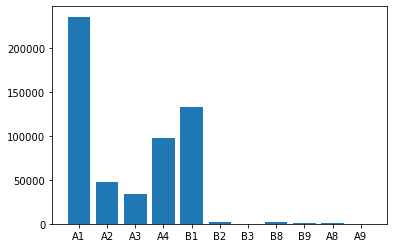

In [29]:
print(Counter(DF['kind_code']))

plot1 = Counter(DF['kind_code'])
plt.bar(plot1.keys(), plot1.values())
plt.show()

### Find the number of single patents 

In [30]:
DF.groupby('patent_number').size().shape

(469802,)

# Analysis of labels

### Keep the latest kind code for each patent

Since all kind codes of the same patent include classification labels, we keep their latest version. This ensures that we work with the most up-to-date classification labels assigned to the most recent kind code of each patent.

In [31]:
DF_=DF.copy()
DF_['labels']=DF_['labels'].fillna("")
DF_=DF_[DF_['labels']!='']
DF_=DF_.sort_values(by = 'xml_file_name', ascending=True)
DF_ = DF_.drop_duplicates(subset = ["patent_number"])
DF_.shape

(469744, 11)

### Example of Label Processing

In [32]:
xx='G01N  33/53        20060101ALI20040803BHEP    '
xx=xx.strip()
xx=xx.rsplit('/')[0]
xx=xx.replace(" ", "")
xx=xx.strip()
xx

'G01N33'

### Find the group labels and their frequencies

In [33]:
# Split the 'labels' column by commas
DF_['labels'] = DF_['labels'].str.split(',')

# Extract the first part of each label after splitting by '/'
DF_['labels'] = DF_['labels'].apply(lambda x: [item.split('/')[0] for item in x])
DF_['labels'] = DF_['labels'].apply(lambda x: [item.replace(" ", "") for item in x])

expanded_DF=DF_['labels'].apply(pd.Series)

# Transform 'na' values of the expanded table into empty content cells
expanded_DF=expanded_DF.fillna("")

# Infer the group label (delete the last I/N character and  empty spaces from the beginning/end - if any)
nums=expanded_DF.shape[1]
for num in range (nums):
    expanded_DF[num]=expanded_DF[num].str.strip()

# Create a new table with group labels and their frequencies
total_counter = Counter()

for num in range(nums):
    exec(f'counter_{num} = Counter(expanded_DF[num])')
    exec(f'total_counter=total_counter+counter_{num}')

code_, freq_ = [], []

for code, freq in total_counter.items():
    code_.append(code)
    freq_.append(freq)

DF_codes = pd.DataFrame()
DF_codes['code'] = code_
DF_codes['freq'] = freq_

# Delete empty rows
DF_codes=DF_codes[DF_codes['code']!='']

# Sort based on freq
DF_codes=DF_codes.sort_values(by = 'freq', ascending=True)

print(DF_codes.shape, DF_codes['freq'].sum())
DF_codes

(9706, 2) 3346298


,code,freq
9706,A43D27,1
8361,E01H13,1
5538,C07G3,1
9311,C23C20,1
9308,D05B43,1
...,...,...
36,Y10T428,26415
102,H04N21,27216
48,G06F3,27749
452,A61B5,35086


### Find the subclass labels and their frequencies

In [34]:
DF_subclass=DF_codes.copy()
DF_subclass['code_subclass']= None
DF_subclass=DF_subclass.reset_index(drop=True)
for i in range (DF_subclass['code'].shape[0]):
    DF_subclass.loc[i, 'code_subclass']=DF_subclass['code'][i][0:4]
DF_subclass['freq_subclass'] = DF_subclass.groupby('code_subclass')['freq'].transform('sum')
DF_subclass = DF_subclass.drop_duplicates(subset = ["code_subclass"])
DF_subclass=DF_subclass.sort_values(by = 'freq_subclass', ascending=True)
DF_subclass=DF_subclass.reset_index(drop=True)

print(DF_subclass.shape, DF_subclass['freq_subclass'].sum())
DF_subclass

(655, 4) 3346298


,code,freq,code_subclass,freq_subclass
0,G06J3,1,G06J,1
1,C10H17,1,C10H,1
2,B62C1,2,B62C,2
3,G10B3,2,G10B,2
4,G03D13,1,G03D,2
...,...,...,...,...
650,G06F2015,2,G06F,92161
651,H01L2027,3,H01L,111824
652,H04L15,1,H04L,113106
653,A61B13,2,A61B,130952


### Plot the distribution of patents per section label

No handles with labels found to put in legend.


(9, 6) 3346298


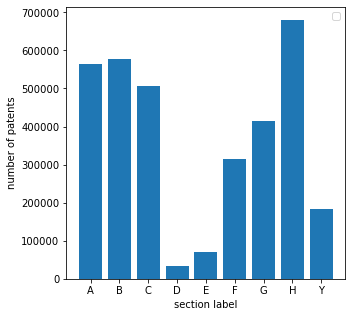

In [35]:
# Prepare the plot: labels_section vs number_patents
DF_plot1_c=DF_subclass.copy()
DF_plot1_c['code_section']= None
DF_plot1_c=DF_plot1_c.reset_index(drop=True)
for i in range (DF_plot1_c['code'].shape[0]):
    DF_plot1_c.loc[i, 'code_section']=DF_plot1_c['code'][i][0:1]
DF_plot1_c['freq_section'] = DF_plot1_c.groupby('code_section')['freq_subclass'].transform('sum')
DF_plot1_c = DF_plot1_c.drop_duplicates(subset = ["code_section"])
DF_plot1_c=DF_plot1_c.sort_values(by = 'code_section', ascending=True)
DF_plot1_c=DF_plot1_c.reset_index(drop=True)

print(DF_plot1_c.shape, DF_plot1_c['freq_section'].sum())

x = DF_plot1_c['code_section']
y = DF_plot1_c['freq_section']

fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches

plt.bar(x,y)#,label="")

plt.xlabel("section label")
plt.ylabel("number of patents")
plt.title("")
plt.legend()
plt.show()

### Define 4 test sets

1. **All Labels** – Includes all available labels.
2. **Excluding Outliers** – Removes labels in the 5%-95% range.
3. **Well-Represented Labels** – Includes labels assigned to more than 50 or 100 patents.
4. **Few-Shot Labels** – Includes labels assigned to fewer than 50 or 100 patents.

In [36]:
# A testing set with all labels
TS1_codes=DF_subclass.copy()
print("Take all labels")
print("TS1", TS1_codes.shape)
print("")

# A testing set excluding the outliers, 5%-95% of labels
low_threshold_rank=round(DF_subclass.shape[0]*0.05)
high_threshold_rank=round(DF_subclass.shape[0]*0.95)
low_threshold=DF_subclass['freq_subclass'][low_threshold_rank-1]
high_threshold=DF_subclass['freq_subclass'][high_threshold_rank-1]
TS2_codes=DF_subclass[(DF_subclass['freq_subclass']>low_threshold) & (DF_subclass['freq_subclass']<high_threshold)]
print("Exclude labels below", low_threshold_rank, "th element and above", high_threshold_rank, "th element")
print("TS2", TS2_codes.shape)
print("")

# A testing set with well-represented labels (over 50 or 100 patents)
TS31_codes=DF_subclass[DF_subclass['freq_subclass']>50]
TS32_codes=DF_subclass[DF_subclass['freq_subclass']>100]
print("Take labels with frequency over 50 and 100")
print("TS31", TS31_codes.shape)
print("TS32", TS32_codes.shape)
print("")

# A testing set with few-shot labels (under 50 or 100)
TS41_codes=DF_subclass[DF_subclass['freq_subclass']<=50]
TS42_codes=DF_subclass[DF_subclass['freq_subclass']<=100]
print("Take few-shot labels with frequency below 50 and 100")
print("TS41", TS41_codes.shape)
print("TS42", TS42_codes.shape)

Take all labels
TS1 (655, 4)

Exclude labels below 33 th element and above 622 th element
TS2 (587, 4)

Take labels with frequency over 50 and 100
TS31 (598, 4)
TS32 (566, 4)

Take few-shot labels with frequency below 50 and 100
TS41 (57, 4)
TS42 (89, 4)


### Populating the test sets with patents based on the following criteria:
1. **Complete Textual Fields** – The patent must have all essential textual fields: abstract, description, and claims.
2. **B Kind Code** – The patent must have a B kind code (B1, B2, B3, B6, B8, B9).
3. **Submission Date** – The patent must have been submitted in the last quarter of 2015 (after October 1, 2015).
4. **Relevant Labels** – The patent must contain at least one of the labels assigned in the specific test set.

### Filter patents based on the first and second criteria
Retain only the patents that:
1. Have all textual fields completed (i.e., abstract, description, and claims).
2. Belong to a B kind code (i.e., B1, B2, B3, B6, B8, B9).

In [37]:
# Find patent_numbers being "A" or "B" kind code
if kind_code_selection==0:
    DF_1=DF[DF['kind_code_letter']=='B']
elif kind_code_selection==1:
    DF_1=DF[DF['kind_code_letter']=='A']
else:
    print("Please provide a valid value for kind_code_selection")
    
DF_1 =DF_1.loc[:, ['patent_number']]

# Find patent_numbers having all textual fields completed in any of the kind code documents
DF_2=DF.copy()
DF_2['adc_exist']= None
DF_2['abstract_lang_en_exist'] = DF_2['abstract_lang_en_exist'].replace({0:np.nan})
DF_2['description_lang_en_exist'] = DF_2['description_lang_en_exist'].replace({0:np.nan})
DF_2['claims_lang_en_exist'] = DF_2['claims_lang_en_exist'].replace({0:np.nan})
DF_2=DF_2.groupby('patent_number').agg({'abstract_lang_en_exist':'last', 'description_lang_en_exist': 'last', \
                                     'claims_lang_en_exist':'last', 'patent_number':'last'})
DF_2 = DF_2.reset_index(drop=True)
DF_2['adc_exist']=DF_2['abstract_lang_en_exist']+DF_2['description_lang_en_exist']+DF_2['claims_lang_en_exist']
DF_2=DF_2[DF_2['adc_exist']==3]
DF_2 =DF_2.loc[:, ['patent_number']]

# Find patent_numbers satisfying both above criteria
# Specifically, merge the two dataframes and since a patent_number may appear more than one time, delete duplicates.
DF_12 = pd.merge(DF_1, DF_2, on=['patent_number'])
DF_12 = DF_12.drop_duplicates(subset = ["patent_number"])
DF_12=DF_12.sort_values(by = 'patent_number', ascending=True)

# Create a list with the detected patent_numbers and remove from the initial dataframe the patent_numbers not listed in this list
doc_number_list=DF_12['patent_number'].tolist()
DF_subpart = DF[DF['patent_number'].isin(doc_number_list)]

# In case of more than one kind codes for a patent, group them and keep the latest non empty field
DF_subpart_merged=DF_subpart.groupby('patent_number').agg({'xml_file_name':'last', 'ucid':'last', 'date':'last', 'labels':'last', 'patent_number':'last'})
DF_subpart_merged = DF_subpart_merged.reset_index(drop=True)
print("Number of patent documents:",DF_subpart.shape, "Number of single patents:", DF_subpart_merged.shape)

Number of patent documents: (19313, 11) Number of single patents: (9261, 5)


### Filter patents based on the third criterion
Retain only the patent documents that:
- Were submitted in the last quarter of 2015 (i.e., after October 1, 2015).

In [38]:
DF_subpart_2=DF_subpart[DF_subpart['date']>date_selection]
DF_subpart_2_merged=DF_subpart_merged[DF_subpart_merged['date']>date_selection]
print("Number of patent documents:",DF_subpart_2.shape, "Number of single patents:", DF_subpart_2_merged.shape)

Number of patent documents: (2855, 11) Number of single patents: (2847, 5)


In [39]:
#DF_subpart_2=DF_subpart_2_merged

### Filter patents based on test set labels
Retain only patents that:
- Contain at least one label assigned in the specific test set.

In [40]:
DF_subpart_2['labels']=DF_subpart_2['labels'].str.split(',')

def remove_patents(gt_DF,patent_DF):

    codes, doc_number = [], []
    patent_number=0

    patent_number= patent_DF.shape[0]
    selected_codes=gt_DF['code_subclass'].tolist()
    for i in range (len(selected_codes)):
        code=selected_codes[i]
        for j in range(patent_number):
            for label in patent_DF['labels'][j]:
                if str(code) in str(label):
                    codes.append(code)
                    doc_number.append(patent_DF['patent_number'][j])

    newDF = pd.DataFrame()
    newDF['patent_number'] = doc_number
    newDF['labels'] = codes

    return newDF

DF_subpart_2=DF_subpart_2.reset_index(drop=True)

print("Creating test set 1")
TS1 = remove_patents(TS1_codes,DF_subpart_2)
TS1 = TS1.drop_duplicates(subset = ["patent_number", "labels"])
TS1 = TS1.groupby('patent_number').agg(','.join)
TS1=TS1.reset_index()
print(TS1.shape)
print("")

print("Creating test set 2")
TS2 = remove_patents(TS2_codes,DF_subpart_2)
TS2 = TS2.drop_duplicates(subset = ["patent_number", "labels"])
TS2 = TS2.groupby('patent_number').agg(','.join)
TS2=TS2.reset_index()
print(TS2.shape)
print("")

print("Creating test sets 3.1 and 3.2")
TS31 = remove_patents(TS31_codes,DF_subpart_2)
TS31 = TS31.drop_duplicates(subset = ["patent_number", "labels"])
TS31 = TS31.groupby('patent_number').agg(','.join)
TS31=TS31.reset_index()
TS32 = remove_patents(TS32_codes,DF_subpart_2)
TS32 = TS32.drop_duplicates(subset = ["patent_number", "labels"])
TS32 = TS32.groupby('patent_number').agg(','.join)
TS32=TS32.reset_index()
print(TS31.shape, TS32.shape)
print("")

print("Creating test sets 4.1 and 4.2")
TS41 = remove_patents(TS41_codes,DF_subpart_2)
TS41 = TS41.drop_duplicates(subset = ["patent_number", "labels"])
TS41 = TS41.groupby('patent_number').agg(','.join)
TS41 = TS41.reset_index()
TS42 = remove_patents(TS42_codes,DF_subpart_2)
TS42 = TS42.drop_duplicates(subset = ["patent_number", "labels"])
TS42 = TS42.groupby('patent_number').agg(','.join)
TS42=TS42.reset_index()
print(TS41.shape, TS42.shape)

Creating test set 1


C:\Users\User\.conda\envs\tensorflow_3_6_13_basic\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(2847, 2)

Creating test set 2
(2179, 2)

Creating test sets 3.1 and 3.2
(2846, 2) (2846, 2)

Creating test sets 4.1 and 4.2
(6, 2) (13, 2)


### Count matching labels in the specific test set

In [41]:
TS1['labels'] = TS1['labels'].str.split(',')
TS2['labels'] = TS2['labels'].str.split(',')
TS31['labels'] = TS31['labels'].str.split(',')
TS32['labels'] = TS32['labels'].str.split(',')
TS41['labels'] = TS41['labels'].str.split(',')
TS42['labels'] = TS42['labels'].str.split(',')

def encode_multilabels(trainDF):

    labels=trainDF['labels']
    multihop_encoder = MultiLabelBinarizer()
    multihop_encoded = multihop_encoder.fit_transform(labels)
    return np.shape(multihop_encoded)[1]

print("In TS1, there are", encode_multilabels(TS1), "labels out of", TS1_codes.shape[0],"included in the test set labels")
print("In TS2, there are", encode_multilabels(TS2), "labels out of", TS2_codes.shape[0],"included in the test set labels")
print("In TS31, there are", encode_multilabels(TS31), "labels out of", TS31_codes.shape[0],"included in the test set labels")
print("In TS32, there are", encode_multilabels(TS32), "labels out of", TS32_codes.shape[0],"included in the test set labels")
print("In TS41, there are", encode_multilabels(TS41), "labels out of", TS41_codes.shape[0],"included in the test set labels")
print("In TS42, there are", encode_multilabels(TS42), "labels out of", TS42_codes.shape[0],"included in the test set labels")

In TS1, there are 488 labels out of 655 included in the test set labels
In TS2, there are 453 labels out of 587 included in the test set labels
In TS31, there are 483 labels out of 598 included in the test set labels
In TS32, there are 476 labels out of 566 included in the test set labels
In TS41, there are 5 labels out of 57 included in the test set labels
In TS42, there are 12 labels out of 89 included in the test set labels


### Retieve all available labels for each patent

Return to the original dataset and extract all classification labels assigned to each patent, not just those included in the specific test set.

In [42]:
def retrieve_TS_patent(TS, DF):
    doc_number_list=TS['patent_number'].tolist()
    DF_subpart_TS_pat_docs = DF[DF['patent_number'].isin(doc_number_list)]
    DF_subpart_TS_pat_docs=DF_subpart_TS_pat_docs[['xml_file_name', 'ucid', 'date', 'labels', 'patent_number']]
    DF_subpart_TS_pat=DF_subpart_TS_pat_docs.groupby('patent_number').agg({'xml_file_name':'last', 'ucid':'last', 'date':'last', 'labels':'last',\
    'patent_number':'last'})
    DF_subpart_TS_pat_docs = DF_subpart_TS_pat_docs.reset_index(drop=True)
    DF_subpart_TS_pat = DF_subpart_TS_pat.reset_index(drop=True)
    print(DF_subpart_TS_pat_docs.shape, DF_subpart_TS_pat.shape)

    return DF_subpart_TS_pat_docs, DF_subpart_TS_pat

DF_TS1_pat_docs, DF_TS1_pat=retrieve_TS_patent(TS1, DF)
DF_TS2_pat_docs, DF_TS2_pat=retrieve_TS_patent(TS2, DF)
DF_TS31_pat_docs, DF_TS31_pat=retrieve_TS_patent(TS31, DF)
DF_TS32_pat_docs, DF_TS32_pat=retrieve_TS_patent(TS32, DF)
DF_TS41_pat_docs, DF_TS41_pat=retrieve_TS_patent(TS41, DF)
DF_TS42_pat_docs, DF_TS42_pat=retrieve_TS_patent(TS42, DF)

(6181, 5) (2847, 5)
(4708, 5) (2179, 5)
(6179, 5) (2846, 5)
(6179, 5) (2846, 5)
(13, 5) (6, 5)
(29, 5) (13, 5)


### Count additional labels in the test set
Calculate the total number of labels present in the test set.

In [43]:
def expand(DF_TS):

    # Expand
    DF_TS['labels']=DF_TS['labels'].str.split(',')
    expanded=DF_TS['labels'].apply(pd.Series)
    expanded=expanded.fillna("")

    # Keep subgroup labels
    nums=expanded.shape[1]
    for num in range (nums):
        expanded[num]=expanded[num].str[0:-1]
        expanded[num]=expanded[num].str.strip()

    #Create a new table with group labels and their frequences
    total_counter = Counter()
    for num in range(nums):
        total_counter=total_counter+Counter(expanded[num])

    code_, freq_ = [], []
    for code, freq in total_counter.items():
        code_.append(code)
        freq_.append(freq)

    final_DF = pd.DataFrame()
    final_DF['code'] = code_
    final_DF['freq'] = freq_

    final_DF=final_DF[final_DF['code']!='']
    final_DF=final_DF.drop_duplicates(subset = ["code"])

    #Create a new table with subclass labels and their frequences
    final_DF['code_subclass']= None
    final_DF=final_DF.reset_index(drop=True)
    for i in range (final_DF['code'].shape[0]):
        final_DF.loc[i, 'code_subclass']=final_DF['code'][i][0:4]
    final_DF['freq_subclass'] = final_DF.groupby('code_subclass')['freq'].transform('sum')
    final_DF = final_DF.drop_duplicates(subset = ["code_subclass"])
    final_DF=final_DF.sort_values(by = 'freq_subclass', ascending=True)
    final_DF=final_DF.reset_index(drop=True)

    return final_DF

DF_TS1_codes=expand(DF_TS1_pat)
DF_TS2_codes=expand(DF_TS2_pat)
DF_TS31_codes=expand(DF_TS31_pat)
DF_TS32_codes=expand(DF_TS32_pat)
DF_TS41_codes=expand(DF_TS41_pat)
DF_TS42_codes=expand(DF_TS42_pat)
print("In TS1, there are", encode_multilabels(TS1), "labels included in the test set labels and ", DF_TS1_codes.shape[0]-encode_multilabels(TS1), "labels not included in the test set codes")
print("In TS2, there are", encode_multilabels(TS2), "labels included in the test set labels and ", DF_TS2_codes.shape[0]-encode_multilabels(TS2), "labels not included in the test set codes")
print("In TS31, there are", encode_multilabels(TS31), "labels included in the test set labels and ", DF_TS31_codes.shape[0]-encode_multilabels(TS31), "labels not included in the test set codes")
print("In TS32, there are", encode_multilabels(TS32), "labels included in the test set labels and ", DF_TS32_codes.shape[0]-encode_multilabels(TS32), "labels not included in the test set codes")
print("In TS41, there are", encode_multilabels(TS41), "labels included in the test set labels and ", DF_TS41_codes.shape[0]-encode_multilabels(TS41), "labels not included in the test set codes")
print("In TS42, there are", encode_multilabels(TS42), "labels included in the test set labels and ", DF_TS42_codes.shape[0]-encode_multilabels(TS42), "labels not included in the test set codes")

In TS1, there are 488 labels included in the test set labels and  0 labels not included in the test set codes
In TS2, there are 453 labels included in the test set labels and  35 labels not included in the test set codes
In TS31, there are 483 labels included in the test set labels and  4 labels not included in the test set codes
In TS32, there are 476 labels included in the test set labels and  11 labels not included in the test set codes
In TS41, there are 5 labels included in the test set labels and  13 labels not included in the test set codes
In TS42, there are 12 labels included in the test set labels and  24 labels not included in the test set codes


### Plot the distribution of patents per section label for all test sets

No handles with labels found to put in legend.


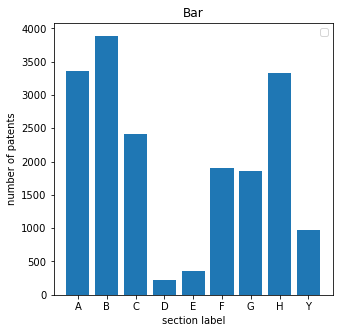

No handles with labels found to put in legend.


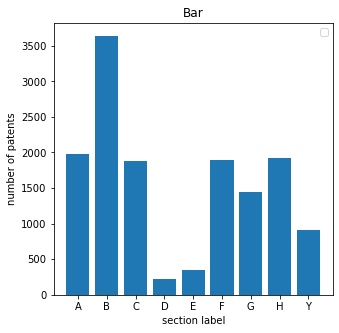

No handles with labels found to put in legend.


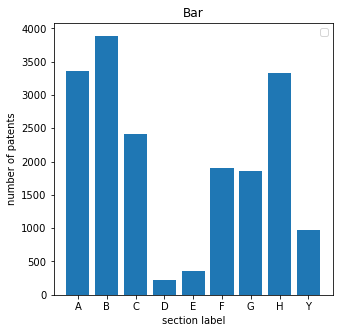

No handles with labels found to put in legend.


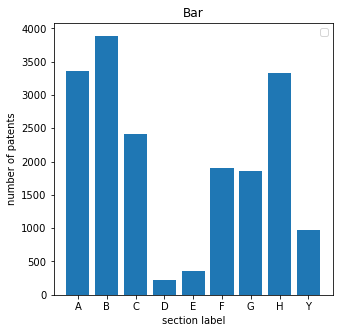

No handles with labels found to put in legend.


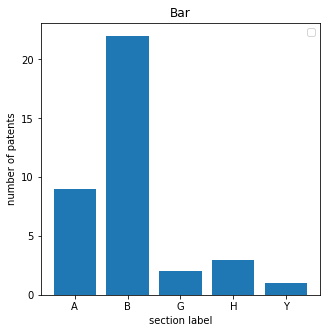

No handles with labels found to put in legend.


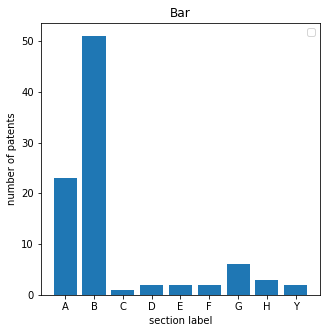

In [44]:
def plot_section(DF_TS_codes):# Prepare the plot: labels_section vs number_patents
    DF_plot1_b=DF_TS_codes.copy()
    DF_plot1_b['code_section']= None
    DF_plot1_b=DF_plot1_b.reset_index(drop=True)
    for i in range (DF_plot1_b['code'].shape[0]):
        DF_plot1_b.loc[i, 'code_section']=DF_plot1_b['code'][i][0:1]
    DF_plot1_b['freq_section'] = DF_plot1_b.groupby('code_section')['freq_subclass'].transform('sum')
    DF_plot1_b = DF_plot1_b.drop_duplicates(subset = ["code_section"])
    DF_plot1_b=DF_plot1_b.sort_values(by = 'code_section', ascending=True)
    DF_plot1_b=DF_plot1_b.reset_index(drop=True)

    x = DF_plot1_b['code_section']
    y = DF_plot1_b['freq_section']

    fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches

    plt.bar(x,y)#,label="")

    plt.xlabel("section label")
    plt.ylabel("number of patents")
    plt.title("Bar")
    plt.legend()
    plt.show()

plot_section(DF_TS1_codes)
plot_section(DF_TS2_codes)
plot_section(DF_TS31_codes)
plot_section(DF_TS32_codes)
plot_section(DF_TS41_codes)
plot_section(DF_TS42_codes)

### Store patent documents and single patents belonging to the test sets

In [45]:
#prefix
if classification_selection==0:
    prefix="ipc_"
elif classification_selection==1:
    prefix="ipcr_"
if classification_selection==2:
    prefix="cpc_"
#sufix
suffix=".csv"    

filename1=prefix+filename1+suffix
filename2=prefix+filename2+suffix
filename3=prefix+filename3+suffix
filename4=prefix+filename4+suffix
filename5=prefix+filename5+suffix
filename6=prefix+filename6+suffix

In [46]:
#Single patents
CLTSname="CLTSep_VP_"
DF_TS1_pat.to_csv(destination_path+CLTSname+filename1, index=False)
DF_TS2_pat.to_csv(destination_path+CLTSname+filename2, index=False)
DF_TS31_pat.to_csv(destination_path+CLTSname+filename3, index=False)
DF_TS32_pat.to_csv(destination_path+CLTSname+filename4, index=False)
DF_TS41_pat.to_csv(destination_path+CLTSname+filename5, index=False)
DF_TS42_pat.to_csv(destination_path+CLTSname+filename6, index=False)

#All patent documents 
CLTSname="CLTSep_PatDocs_"
DF_TS1_pat_docs.to_csv(destination_path+CLTSname+filename1, index=False)
DF_TS2_pat_docs.to_csv(destination_path+CLTSname+filename2, index=False)
DF_TS31_pat_docs.to_csv(destination_path+CLTSname+filename3, index=False)
DF_TS32_pat_docs.to_csv(destination_path+CLTSname+filename4, index=False)
DF_TS41_pat_docs.to_csv(destination_path+CLTSname+filename5, index=False)
DF_TS42_pat_docs.to_csv(destination_path+CLTSname+filename6, index=False)